# Bharat Intern Internship Program

## GRIP - Data Science And Machine Learning Tasks.

## Name: Shubhangi Dighe.

### Task 2 :Prediction Using Unsupervised Machine Learning.

### Objective: Wine Quality Prediction

## Import Some Libraries  

In [27]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

################# visualization #################
import matplotlib.pyplot as plt 
from PIL import  Image
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [2]:
################################## Data Analysis & Calculation ##################################
import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline



## Data Import 

In [4]:
#to import the data
New = pd.read_csv(r"C:\Users\shubh\Desktop\BharatIntern-Task\winequalityN.csv")
New

,type,fixed_acidity,volatile_acidity,citric_acid,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...
6115,red,6.2,0.600,0.08,0.99490,3.45,0.58,10.5,5
6116,red,5.9,0.550,0.10,0.99512,3.52,NaN,11.2,6
6117,red,6.3,0.510,0.13,0.99574,3.42,0.75,11.0,6
6118,red,5.9,0.645,0.12,0.99547,3.57,0.71,10.2,5


## Data Preprocessing

#### # Datatype and conversion
 

In [5]:
#Checking information like Datatype, Column, Rows entries
New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              6120 non-null   object 
 1   fixed_acidity     6112 non-null   float64
 2   volatile_acidity  6114 non-null   float64
 3   citric_acid       6117 non-null   float64
 4   density           6120 non-null   float64
 5   pH                6114 non-null   float64
 6   sulphates         6116 non-null   float64
 7   alcohol           6120 non-null   float64
 8   quality           6120 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 430.4+ KB


In [6]:
#Describe the Data
New.describe()

,fixed_acidity,volatile_acidity,citric_acid,density,pH,sulphates,alcohol,quality
count,6112.00000,6114.000000,6117.000000,6120.000000,6114.000000,6116.000000,6120.000000,6120.000000
mean,7.24294,0.342733,0.317932,0.994724,3.218785,0.532716,10.507848,5.818627
std,1.32007,0.167549,0.146435,0.003012,0.161234,0.151059,1.195807,0.873300
min,3.80000,0.080000,0.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.40000,0.230000,0.240000,0.992380,3.110000,0.430000,9.500000,5.000000
50%,7.00000,0.295000,0.310000,0.994940,3.210000,0.510000,10.300000,6.000000
75%,7.70000,0.410000,0.390000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.90000,1.580000,1.660000,1.038980,4.010000,2.000000,14.900000,9.000000


#### Checking Missing Value   

In [7]:
# count the number of NaN values in each column
New.isnull().sum()

type                0
fixed_acidity       8
volatile_acidity    6
citric_acid         3
density             0
pH                  6
sulphates           4
alcohol             0
quality             0
dtype: int64

#### # Replacing Missing value by Mode 

In [9]:
New.isnull().sum()

type                0
fixed_acidity       0
volatile_acidity    0
citric_acid         0
density             0
pH                  6
sulphates           4
alcohol             0
quality             0
dtype: int64

In [10]:
#View top 5 rows
New.head()

,type,fixed_acidity,volatile_acidity,citric_acid,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,0.9956,3.19,0.40,9.9,6


#### # Checking & Treatment the otlier 

<AxesSubplot:>

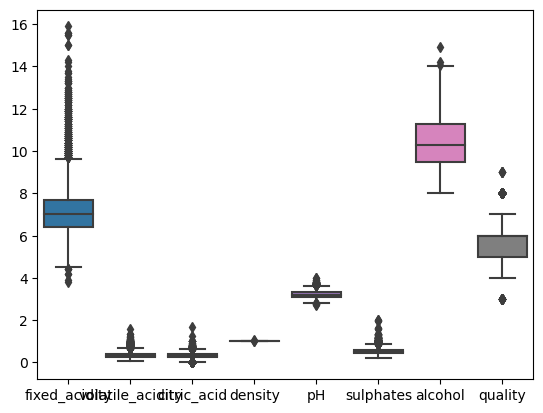

In [11]:
#Checking outlier present or not
sns.boxplot(data=New)

In [12]:
#if outlier is present then remove it 
for i in New:
    if New[i].dtypes in ("float64","int64"):
        q1 = New[i].quantile(0.25)
        q3 = New[i].quantile(0.75)
        iqr = q3-q1
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr
        New[i].clip(upper=ul,lower=ll,inplace=True)

<AxesSubplot:>

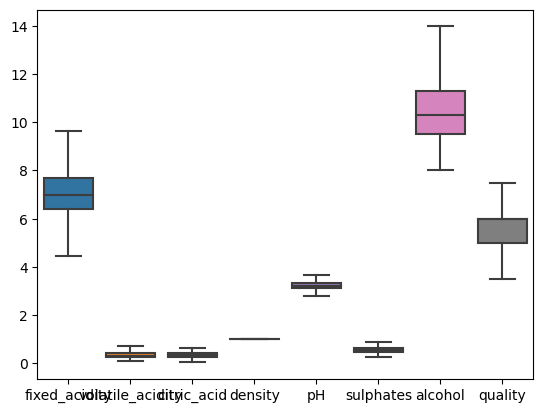

In [13]:
#After removing the outlier
sns.boxplot(data=New)

<AxesSubplot:ylabel='volatile_acidity'>

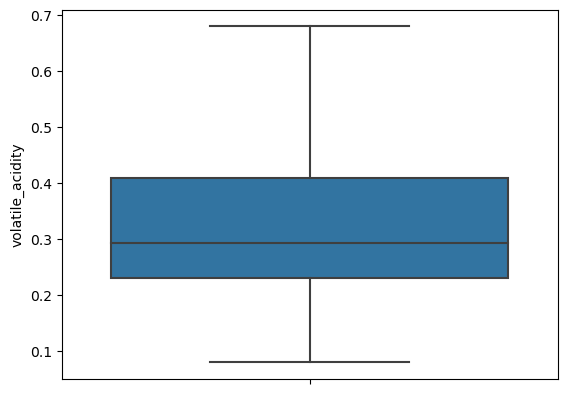

In [14]:
#After removing the outlier
sns.boxplot(y='volatile_acidity',data=New)  # Single Variable

In [15]:
#if outlier is present then remove it 
for i in New:
    if New[i].dtypes in ("float64","int64"):
        q1 = New[i].quantile(0.25)
        q3 = New[i].quantile(0.75)
        iqr = q3-q1
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr
        New[i].clip(upper=ul,lower=ll,inplace=True)

<AxesSubplot:ylabel='volatile_acidity'>

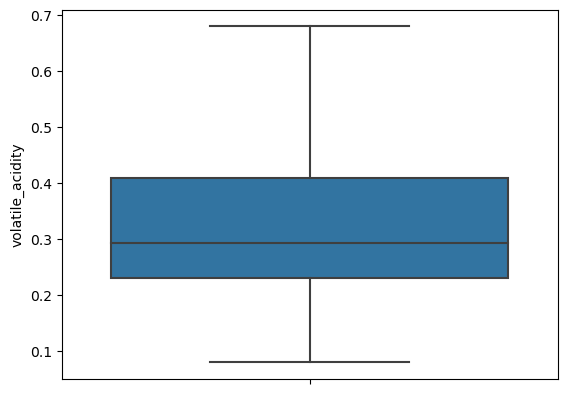

In [16]:
#After removing the outlier
sns.boxplot(y='volatile_acidity',data=New)  # Single Variable

## Data Visualization


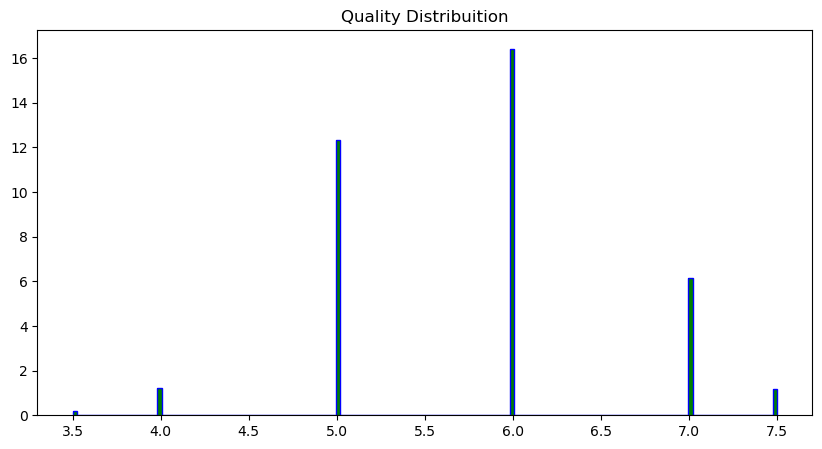

In [17]:
plt.figure(figsize =(10, 5))
plt.title('Quality Distribuition')
plt.hist(New.quality , bins =150 , color = "g" ,density =True)
plt.hist(New.quality , bins =150 , color = "b" ,density =True , histtype='step' )
plt.show()

<AxesSubplot:xlabel='quality', ylabel='type'>

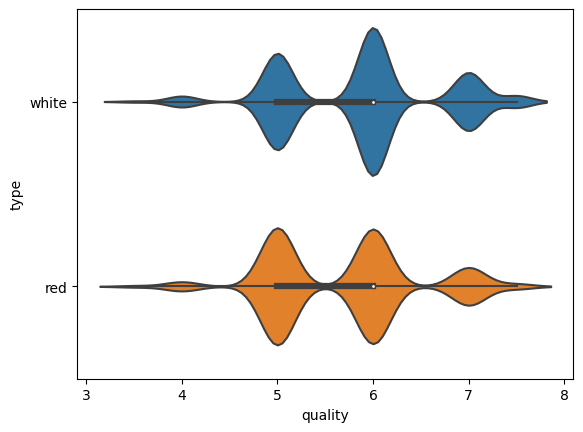

In [18]:
sns.violinplot(data =New, y ="type", x = "quality" )

<AxesSubplot:>

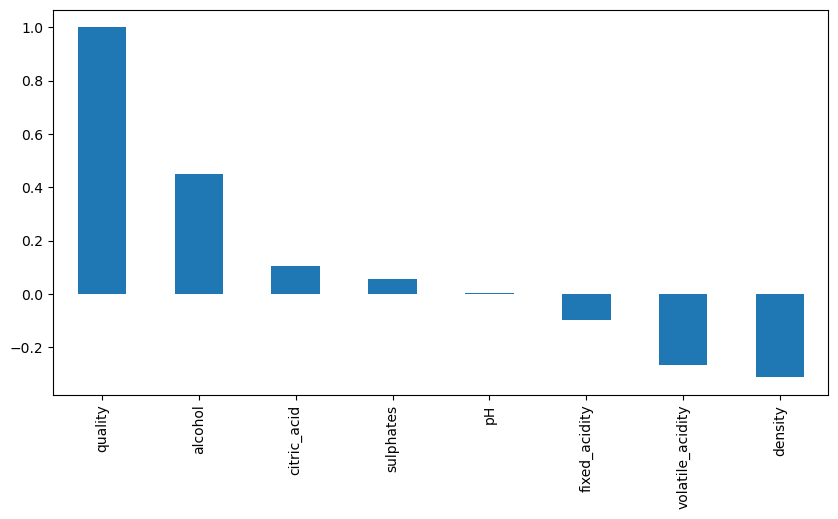

In [19]:
corr_mat=New.corr()
plt.figure(figsize=(10,5))
corr_mat['quality'].sort_values(ascending=False).plot(kind='bar')

# 1) Logistic Regression

## Data Visulization  

#### # Bad wine analysis 

In [20]:
New.type.value_counts()

white    4346
red      1774
Name: type, dtype: int64

In [21]:
(4898/6497)*100 # 75.40 % is white wine in data 

75.38864091118978

<AxesSubplot:xlabel='type', ylabel='count'>

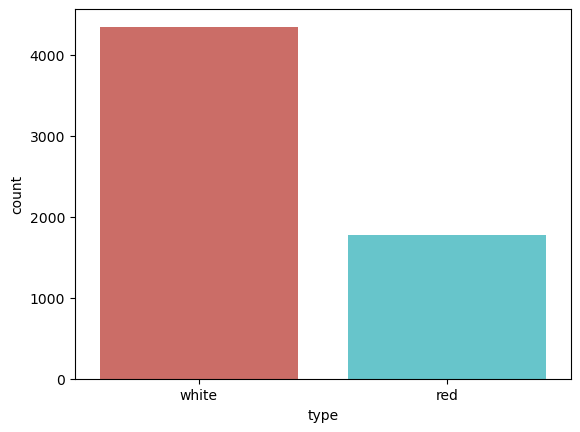

In [22]:
sns.countplot(x='type',data=New,palette='hls')

In [23]:
import plotly.express as px

fig = px.pie(New,names='type',color='type',
             color_discrete_map={'white ':'white',
                                 'red':'red'})
fig.show()

Text(0, 0.5, 'quality')

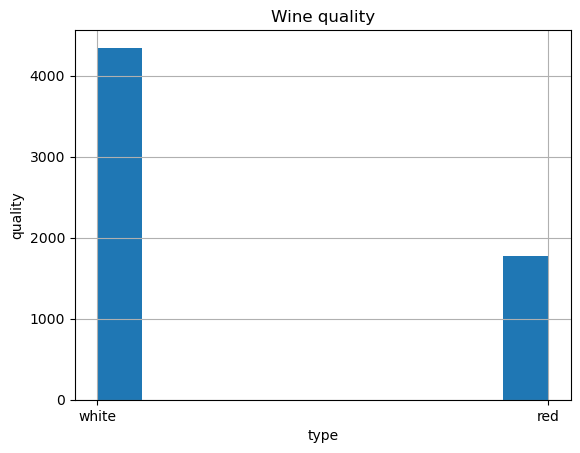

In [24]:
New.type.hist()
plt.title('Wine quality')
plt.xlabel('type')
plt.ylabel('quality')
#plt.savefig('Income_age')

Text(0, 0.5, 'Frequency')

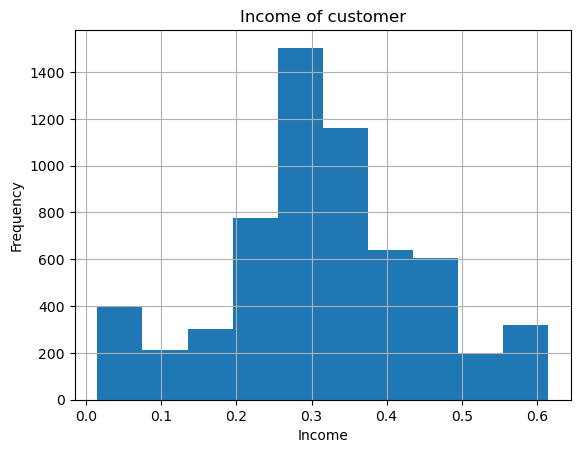

In [25]:
New.citric_acid.hist()
plt.title('Income of customer')
plt.xlabel('Income')
plt.ylabel('Frequency')
#plt.savefig('Income_age')

#### # Reject wine data = Bad wine

In [26]:
New_yes= New[New["type"] == "white"]  # 269

New_yes

,type,fixed_acidity,volatile_acidity,citric_acid,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,1.00100,3.00,0.45,8.8,6.0
1,white,6.3,0.30,0.34,0.99400,3.30,0.49,9.5,6.0
2,white,8.1,0.28,0.40,0.99510,3.26,0.44,10.1,6.0
3,white,7.2,0.23,0.32,0.99560,3.19,0.40,9.9,6.0
4,white,7.2,0.23,0.32,0.99560,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...
4516,white,6.2,0.21,0.29,0.99114,3.27,0.50,11.2,6.0
4517,white,6.6,0.32,0.36,0.99490,3.15,0.46,9.6,5.0
4518,white,6.5,0.28,0.19,0.99254,2.99,0.46,9.4,6.0
4519,white,5.5,0.29,0.30,0.98869,3.34,0.38,12.8,7.0


## Breaking Data into Two Part
* Quantitative Variable
* Qualitative Variable 

In [57]:
New.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,17.55,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [58]:
New.select_dtypes(include=[np.number]).columns.tolist()

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [59]:
# Qualitative Variable
Quantitative_Variable = New[New.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,17.55,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0


In [60]:
Qualitative_Variable = New[New.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

,type
0,white
1,white
2,white


#### # Converting qualitative Variable into number

In [61]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,type
0,1
1,1
2,1
3,1
4,1


#### # Combining the data set

In [62]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,17.55,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,1,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,1,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,1,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


## Data Partition 

In [63]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = Final_combined.drop('type', axis = 1)
Y = Final_combined[['type']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=85)

In [64]:
y_train

,type
3435,1
1164,1
4225,1
841,1
5971,0
...,...
5715,0
1587,1
5828,0
5280,0


In [65]:
X_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
2934,5.3,0.210,0.29,0.7,0.0280,11.0,66.0,0.99215,3.30,0.400,9.8,5.0
6426,7.9,0.290,0.49,2.2,0.0960,21.0,59.0,0.99714,3.31,0.670,10.1,6.0
4985,7.7,0.490,0.26,1.9,0.0620,9.0,31.0,0.99660,3.39,0.640,9.6,5.0
1237,7.3,0.240,0.39,3.6,0.0240,35.0,116.0,0.99280,3.17,0.510,10.9,5.0
4433,6.9,0.560,0.26,10.9,0.0600,55.0,193.0,0.99690,3.21,0.440,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4114,7.5,0.210,0.29,1.5,0.0460,35.0,107.0,0.99123,3.15,0.450,11.3,6.0
6400,7.3,0.585,0.18,2.4,0.0780,15.0,60.0,0.99638,3.31,0.540,9.8,5.0
866,6.9,0.180,0.36,1.3,0.0360,40.0,117.0,0.99340,3.27,0.855,9.5,7.0
3681,7.0,0.220,0.26,9.2,0.0270,37.0,122.0,0.99228,3.06,0.340,12.5,7.5


## Model Building 

### Hypothesis <br>
###### H0 :- There is no log linear relationship between wine_quality and all independent Variable <br>
   ######  vs <br>
###### H1 :- There is  log linear relationship between wine_quality and all independent Variable <br> <br>
###### Alpha = 0.05 (5%)


## Method 1 - Logistics Regression 

#Needed to run the logistic regression
import statsmodels.formula.api as smf
result=smf.logit("Loan_Status~C(Gender)+C(Married)+C(Education)+C(Self_Employed)+C(Previous_Loan_Taken)+C(Property_Area)+C(Customer_Bandwith)+C(Tenure_group)+Age+Dependents+LoanAmount+Cibil_Score+ApplicantIncome",data=train).fit()
print(result.summary2())

## Method 2 - Logistics Regression 

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
output=logreg.fit(X_train, y_train) # model

In [67]:
output.intercept_  # beta

array([1.72150845])

In [68]:
output.coef_  # Beta 1 -- 

array([[-0.71679993, -8.89523686,  1.48744686,  0.16823938, -1.51889445,
        -0.0480783 ,  0.06200591,  1.59979086, -1.12936172, -7.01986841,
         0.73455485,  0.13535075]])

In [69]:
output.n_features_in_

12

We Reject Ho <br>
There is  log linear relationship between wine_quality and all independent Variable

##  Predictions on Train Dataset 

In [70]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
3435,6.5,0.240,0.28,1.1,0.034,26.0,83.0,0.98928,3.25,0.33,12.3,6.0,1
1164,8.2,0.230,0.49,0.9,0.057,15.0,73.0,0.99280,3.07,0.38,10.4,6.0,1
4225,6.2,0.345,0.27,10.1,0.056,38.0,187.0,0.99486,3.31,0.56,10.6,5.0,1
841,8.7,0.230,0.32,13.4,0.044,35.0,169.0,0.99975,3.12,0.47,8.8,7.0,1
5971,8.0,0.620,0.33,2.7,0.088,16.0,37.0,0.99720,3.31,0.58,10.7,6.0,0


In [71]:
train['Predicted']=output.predict(X_train)
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,Predicted
3435,6.5,0.240,0.28,1.1,0.034,26.0,83.0,0.98928,3.25,0.33,12.3,6.0,1,1
1164,8.2,0.230,0.49,0.9,0.057,15.0,73.0,0.99280,3.07,0.38,10.4,6.0,1,1
4225,6.2,0.345,0.27,10.1,0.056,38.0,187.0,0.99486,3.31,0.56,10.6,5.0,1,1
841,8.7,0.230,0.32,13.4,0.044,35.0,169.0,0.99975,3.12,0.47,8.8,7.0,1,1
5971,8.0,0.620,0.33,2.7,0.088,16.0,37.0,0.99720,3.31,0.58,10.7,6.0,0,0


## Model Performance Metric 

In [72]:
#first perform the confusion matric
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['type'])
matrix

array([[1213,   40],
       [  55, 3889]], dtype=int64)

#### # Accuracy with Sensitivity and Specificity of Train Data 

In [73]:
from sklearn.metrics import classification_report
print(classification_report(train['type'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1268
           1       0.99      0.99      0.99      3929

    accuracy                           0.98      5197
   macro avg       0.98      0.97      0.98      5197
weighted avg       0.98      0.98      0.98      5197



* Accuracy of Model is 98%,Hence Model is Over Fit <br>
* Accuracy of white wine Capture by Model is 99% ( Sensitivity ) <br>
* Accuracy of red wine Capture by Model is 96% (Specificity)

## Predictions on Test Dataset 

In [74]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
2934,5.3,0.21,0.29,0.7,0.028,11.0,66.0,0.99215,3.30,0.40,9.8,5.0,1
6426,7.9,0.29,0.49,2.2,0.096,21.0,59.0,0.99714,3.31,0.67,10.1,6.0,0
4985,7.7,0.49,0.26,1.9,0.062,9.0,31.0,0.99660,3.39,0.64,9.6,5.0,0
1237,7.3,0.24,0.39,3.6,0.024,35.0,116.0,0.99280,3.17,0.51,10.9,5.0,1
4433,6.9,0.56,0.26,10.9,0.060,55.0,193.0,0.99690,3.21,0.44,9.4,5.0,1


In [75]:
test['Predicted']=output.predict(X_test)
test.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,Predicted
2934,5.3,0.21,0.29,0.7,0.028,11.0,66.0,0.99215,3.30,0.40,9.8,5.0,1,1
6426,7.9,0.29,0.49,2.2,0.096,21.0,59.0,0.99714,3.31,0.67,10.1,6.0,0,0
4985,7.7,0.49,0.26,1.9,0.062,9.0,31.0,0.99660,3.39,0.64,9.6,5.0,0,0
1237,7.3,0.24,0.39,3.6,0.024,35.0,116.0,0.99280,3.17,0.51,10.9,5.0,1,1
4433,6.9,0.56,0.26,10.9,0.060,55.0,193.0,0.99690,3.21,0.44,9.4,5.0,1,1


## Model Performance Metrics on Test data

In [76]:
#first we perform the confusion matrics
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['type'])
print(matrix)

[[307   9]
 [ 24 960]]


#### # Accuracy with Sensitivity and Specificity of Test Data 

In [77]:
from sklearn.metrics import classification_report
print(classification_report(test['type'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       331
           1       0.98      0.99      0.98       969

    accuracy                           0.97      1300
   macro avg       0.97      0.96      0.97      1300
weighted avg       0.97      0.97      0.97      1300



* Accuracy of Model is 97%,Hence Model is Over Fit <br>
* Accuracy of Bad Customer Capture by Model is 99% ( Sensitivity ) <br>
* Accuracy of Good Customer Capture by Model is 93%

# Thank you!